In [641]:
#importing required libraries
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [642]:
#readind given csv file
df = pd.read_csv(r'/Users/ganeshan/Downloads/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [643]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [645]:
df.shape

(205, 26)

In [646]:
#renaming column name carweight
df.rename({'curbweight':'carweight'},inplace = True,axis =1)

In [647]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,carweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [648]:
#data cleaning, and derived carcompanyname to get only car company name without model name
df.CarName =df.CarName.apply(lambda x:x.replace('-',' '))
df['CarCompanyName'] =df.CarName.apply(lambda x: x.split(' ')).str[0]


In [649]:
#data cleaning is done by replacing the same company name with spelling mistakes.
df['CarCompanyName']=df['CarCompanyName'].apply(lambda x: x.lower())
df.CarCompanyName =df.CarCompanyName.apply(lambda x:x.lower().replace('vw','volkswagen'))
df.CarCompanyName =df.CarCompanyName.apply(lambda x:x.replace('vokswagen','volkswagen'))
df.CarCompanyName =df.CarCompanyName.apply(lambda x:x.lower().replace('toyouta','toyota'))
df.CarCompanyName =df.CarCompanyName.apply(lambda x:x.lower().replace('porsche','porcshce'))
df.CarCompanyName =df.CarCompanyName.apply(lambda x:x.lower().replace('Nissan','nissan'))
df.CarCompanyName =df.CarCompanyName.apply(lambda x:x.lower().replace('maxda','mazda'))

In [650]:
print(df['CarCompanyName'].nunique())

22


In [651]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'carweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompanyName'],
      dtype='object')

In [652]:
categoricallist =['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',  'enginetype',
       'cylindernumber',  'fuelsystem',  'CarCompanyName']
numericallist =['wheelbase',
       'carlength', 'carwidth', 'carheight', 'carweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']
df[categoricallist]=df[categoricallist].apply(pd.Categorical)
df[numericallist]=df[numericallist].apply(pd.to_numeric)

In [653]:
#checking dataset has duplicated or not
any(df.duplicated())

False

Text(0.5,1,'Car Price Distribution')

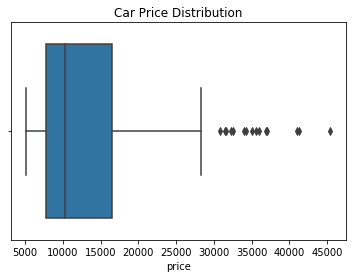

In [654]:
#checking outliers for price variable
sns.boxplot('price',data =df)
plt.title('Car Price Distribution')

In [655]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [656]:
q1,q3 = np.percentile(df.price,[25,75])
IQR = q3-q1
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR
print("lower bound:",lowerbound)
print("upper bound:",upperbound)
print("outliers: ",(df.loc[df.price<lowerbound].shape[0]+df.loc[df.price>upperbound].shape[0])/df.shape[0]*100)
print("no. of records having outliers:",df.loc[df.price>upperbound].shape[0])

lower bound: -5284.5
upper bound: 29575.5
outliers:  7.317073170731707
no. of records having outliers: 15


#### 7% outliers in price column. Other fields dont have much outliers.

In [657]:
#checking any field has one unique value
df.loc[:,df.apply(pd.Series.nunique) == 1].shape[1]

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

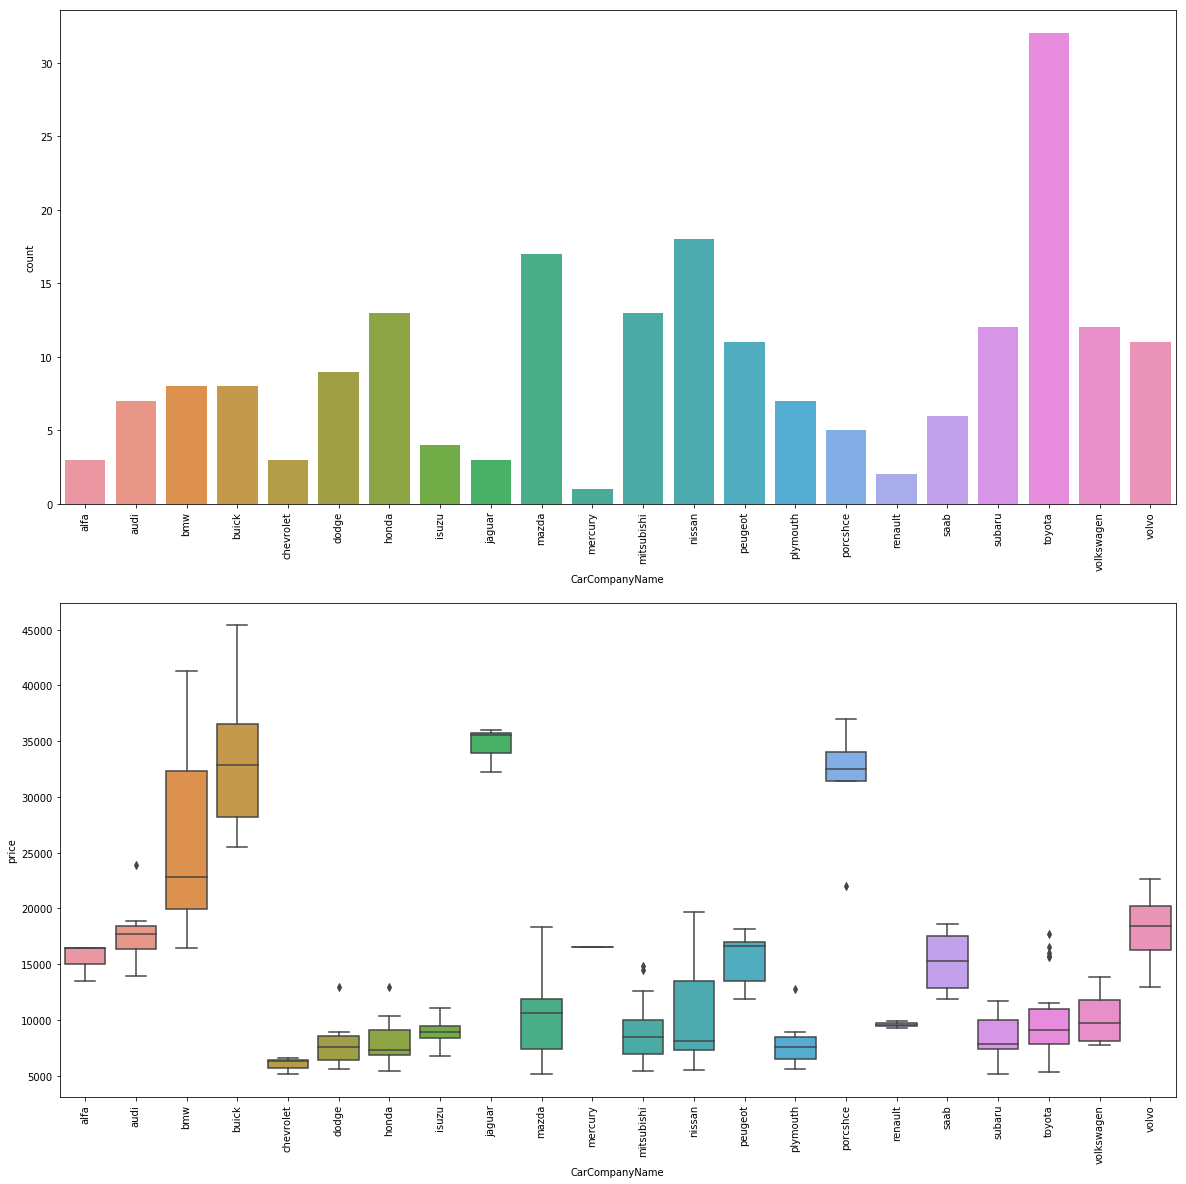

In [658]:
#plotting carcompanyname for each category and showing the realtion with price
figure = plt.figure(figsize=(20,20))
plt.subplot2grid((2,1),(0,0))
sns.countplot(x='CarCompanyName',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((2,1),(1,0))
sns.boxplot(x='CarCompanyName',y='price',data =df)
plt.xticks(rotation=90)


#### Toyota has more count, means it is more favourite company.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

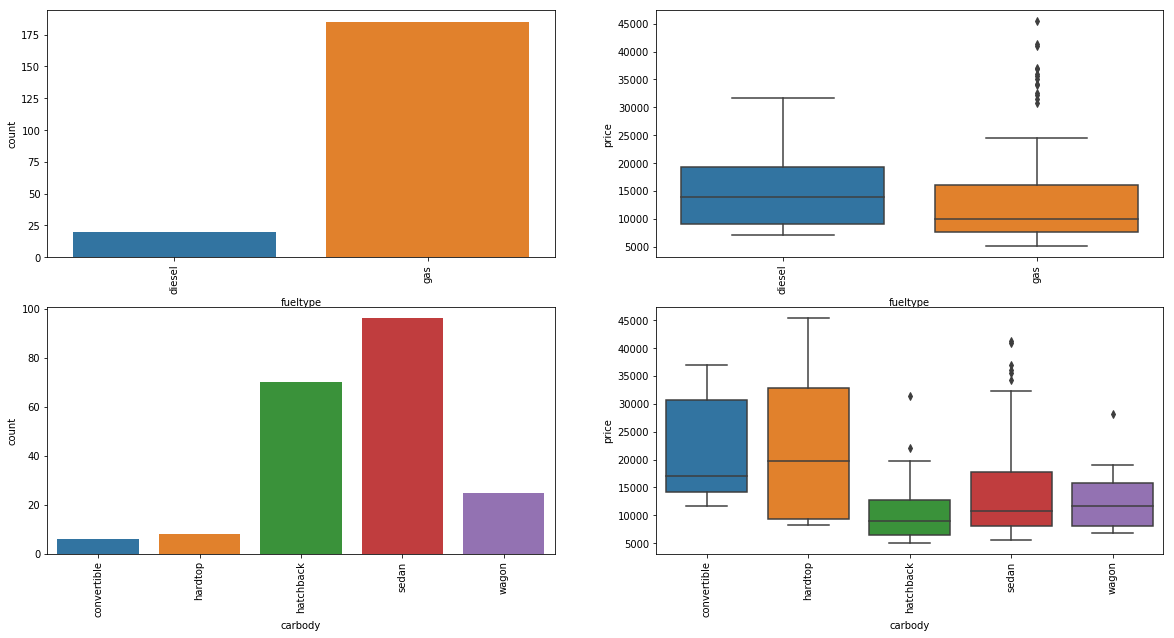

In [659]:
#plotting fueltype and carbody couting and showing relation with price
figure = plt.figure(figsize=(20,10))
plt.subplot2grid((2,2),(0,0))
sns.countplot(x='fueltype',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((2,2),(0,1))
sns.boxplot(x='fueltype',y='price',data =df)
plt.xticks(rotation=90)


plt.subplot2grid((2,2),(1,0))
sns.countplot(x='carbody',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((2,2),(1,1))
sns.boxplot(x='carbody',y='price',data =df)
plt.xticks(rotation=90)

#### more cars are  of gas fuel type. sedan car body has more favourite

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

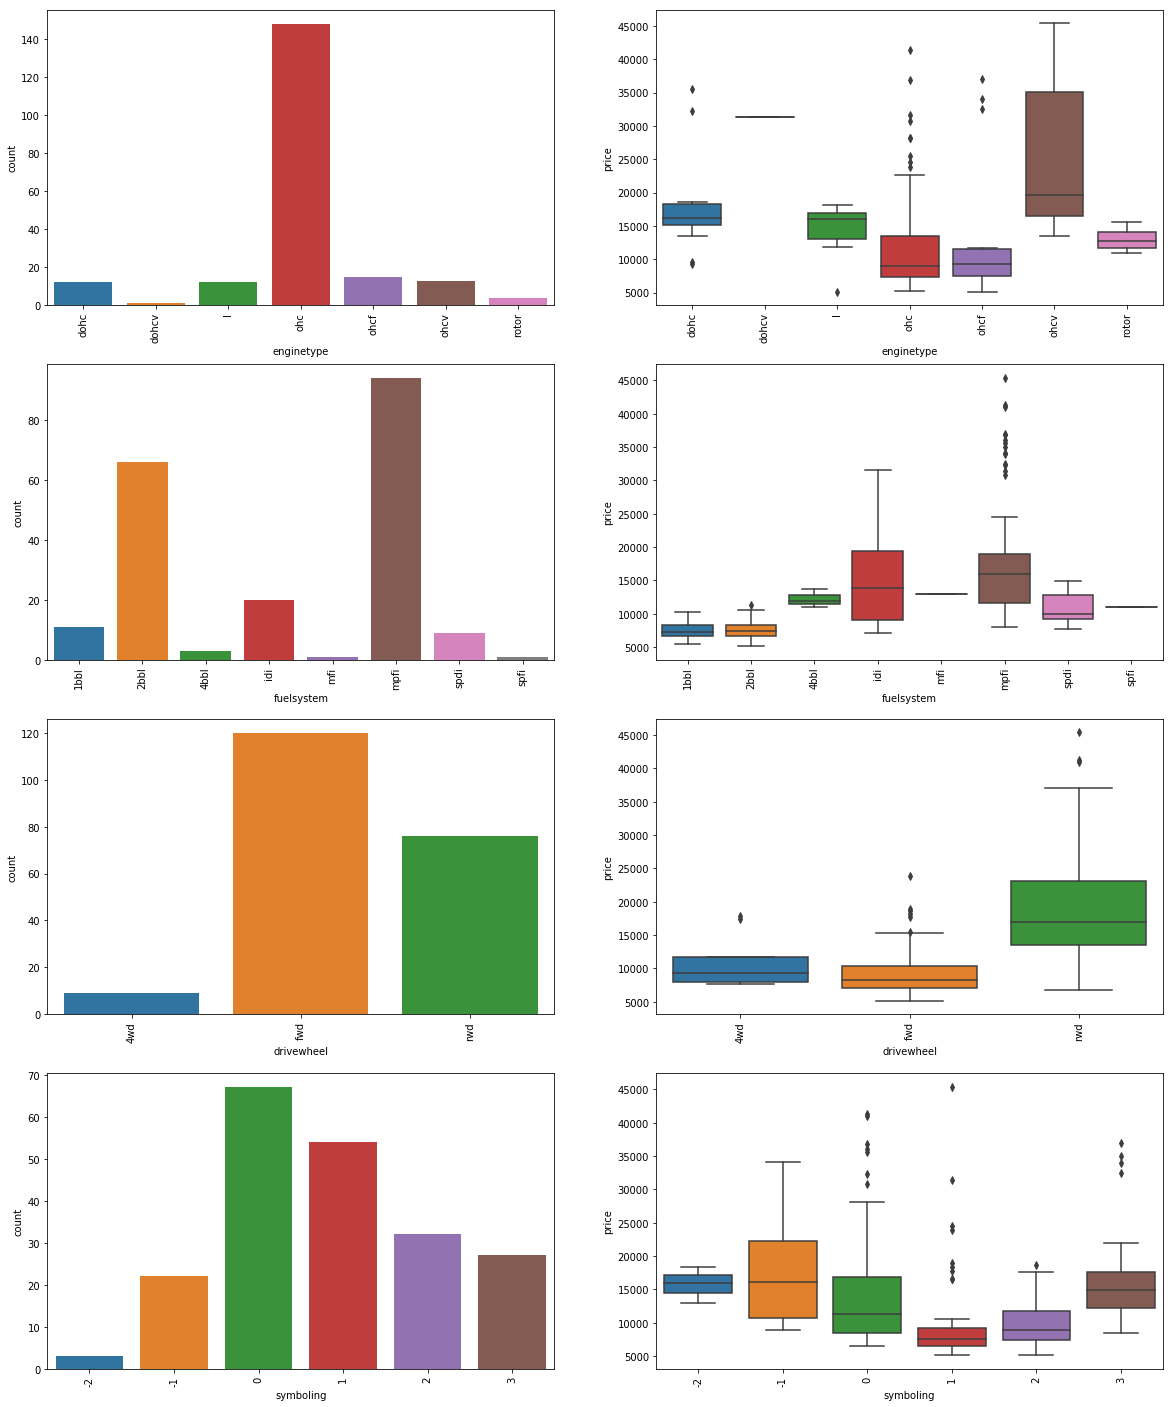

In [660]:
#plotting all categorical variable and showing the relation with price
figure = plt.figure(figsize=(20,25))
plt.subplot2grid((4,2),(0,0))
sns.countplot(x='enginetype',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(0,1))
sns.boxplot(x='enginetype',y='price',data =df)
plt.xticks(rotation=90)

plt.subplot2grid((4,2),(1,0))
sns.countplot(x='fuelsystem',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(1,1))
sns.boxplot(x='fuelsystem',y='price',data =df)
plt.xticks(rotation=90)

plt.subplot2grid((4,2),(2,0))
sns.countplot(x='drivewheel',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(2,1))
sns.boxplot(x='drivewheel',y='price',data =df)
plt.xticks(rotation=90)

plt.subplot2grid((4,2),(3,0))
sns.countplot(x='symboling',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(3,1))
sns.boxplot(x='symboling',y='price',data =df)
plt.xticks(rotation=90)

#### favourte engine type is ohc which has low price range. ohcv has high price range. dohcv has very low record which is not considerable.
#### fuel system has few data points in most of the category which is not considerable.
#### forward drivewheel counting is more. rwd drive wheel and forward drive wheel has high price range.


(array([0, 1]), <a list of 2 Text xticklabel objects>)

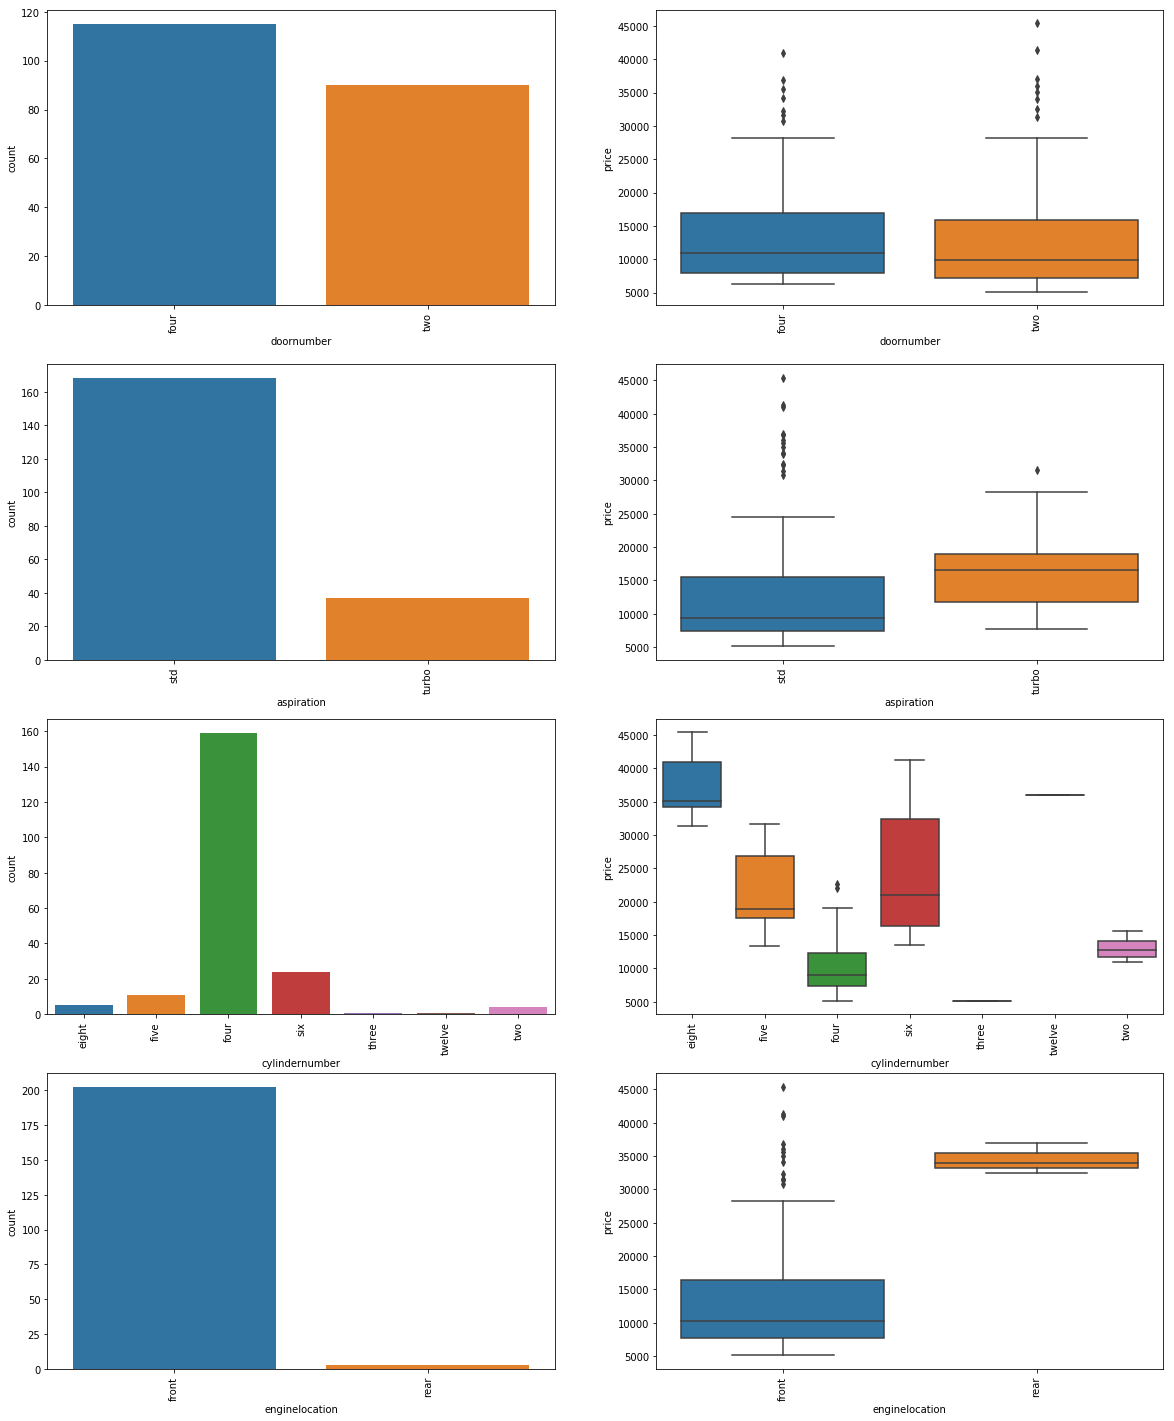

In [661]:
#plotting all categorical variable and showing the relation with price
figure = plt.figure(figsize=(20,25))
plt.subplot2grid((4,2),(0,0))
sns.countplot(x='doornumber',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(0,1))
sns.boxplot(x='doornumber',y='price',data =df)
plt.xticks(rotation=90)

plt.subplot2grid((4,2),(1,0))
sns.countplot(x='aspiration',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(1,1))
sns.boxplot(x='aspiration',y='price',data =df)
plt.xticks(rotation=90)

plt.subplot2grid((4,2),(2,0))
sns.countplot(x='cylindernumber',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(2,1))
sns.boxplot(x='cylindernumber',y='price',data =df)
plt.xticks(rotation=90)

plt.subplot2grid((4,2),(3,0))
sns.countplot(x='enginelocation',data =df)
plt.xticks(rotation=90)
plt.subplot2grid((4,2),(3,1))
sns.boxplot(x='enginelocation',y='price',data =df)
plt.xticks(rotation=90)






#### no difference in Door number 2 and 4 with price correlation.
#### aspiration std has high count. but with price both std and turbo has no difference
#### cylinder number 4 has favourite one, cylinder number 8 has high price range
#### engine location has very few datapoints.

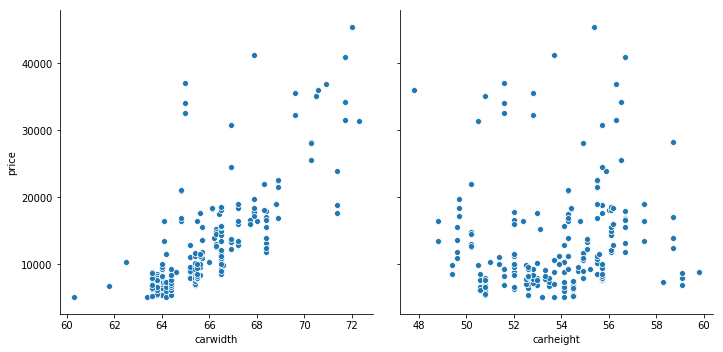

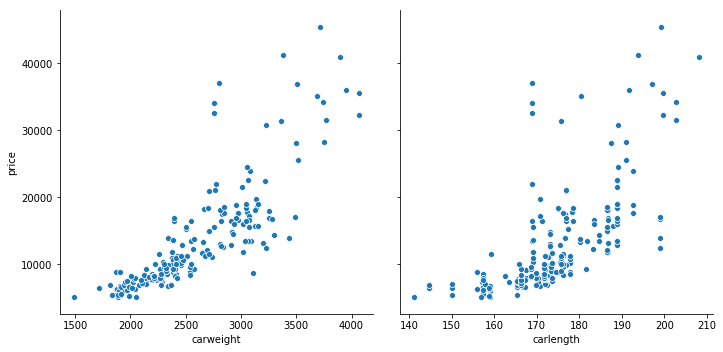

In [662]:
#plotting car hight,weight, width, length with price correlation
sns.pairplot(df, x_vars=['carwidth','carheight'], y_vars='price',height=5)
sns.pairplot(df, x_vars=['carweight','carlength'], y_vars='price',height=5)

#### car width, wieght, length has significant with price but not hight

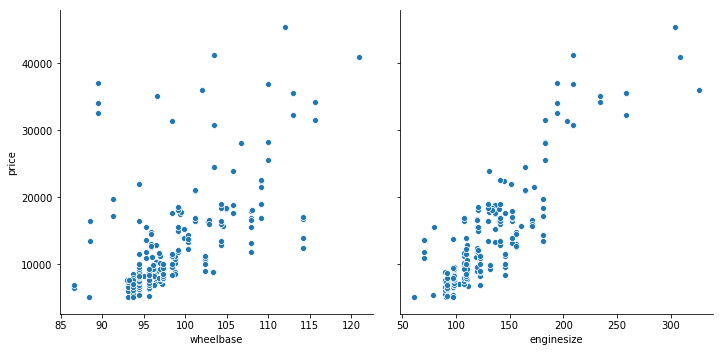

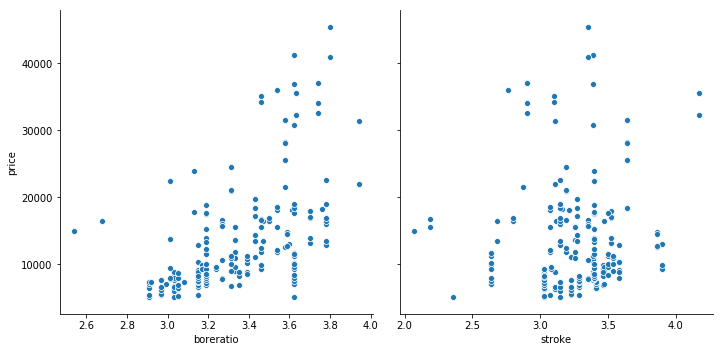

In [663]:
sns.pairplot(df, x_vars=['wheelbase','enginesize'], y_vars='price',height=5)
sns.pairplot(df, x_vars=['boreratio','stroke'], y_vars='price',height=5)


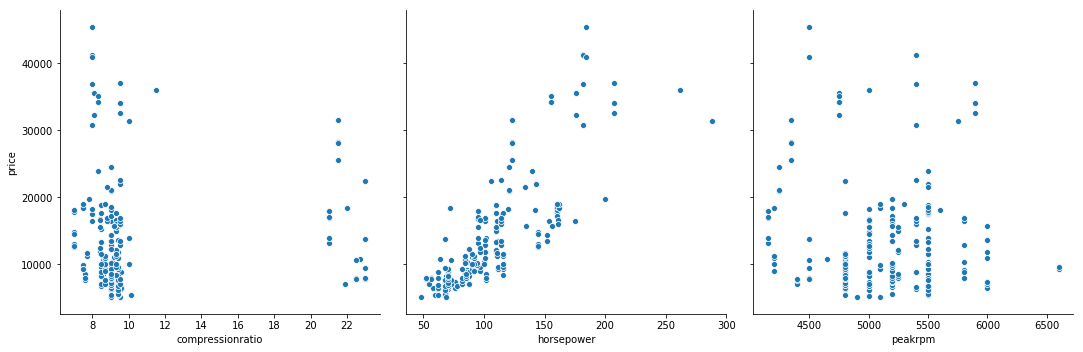

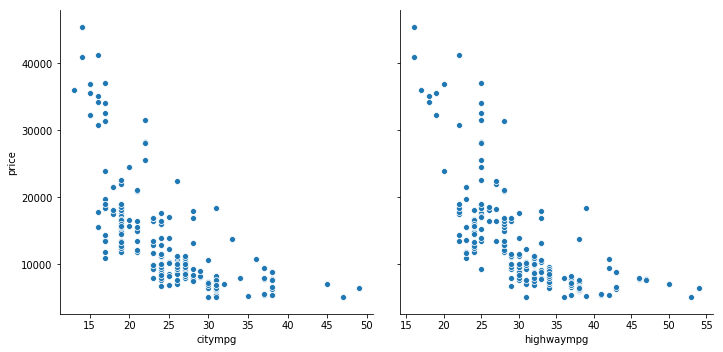

In [664]:
#plotting relation between numerical variable with price
sns.pairplot(df, x_vars=['compressionratio','horsepower','peakrpm'], y_vars='price',height=5)

sns.pairplot(x_vars =['citympg','highwaympg'],y_vars=['price'],data =df,height =5)

#### citympg, highway mpg has negative correlation with price. 
#### horsepower, wheelbase, engine size,boreratio are significant variables with price
#### compressionratio,peakrpm are not significant variables with price

In [665]:
#finding average price for each car company 
carcompany_avgprice =pd.pivot_table(df,index = 'CarCompanyName',values='price',aggfunc='mean')
carcompany_avgprice.columns = ['CompanyAvgPrice']
carcompany_avgprice.reset_index()
df=df.merge(carcompany_avgprice,how ='left',on = 'CarCompanyName')

# binning company with its average price low, medium, high range
bins = [0,10000,20000,40000]
cars_bin=['Low','Medium','Luxury']
df['CarRange'] = pd.cut(df['CompanyAvgPrice'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,CompanyAvgPrice,CarRange
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa,15498.333333,Medium
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa,15498.333333,Medium
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa,15498.333333,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Medium


In [666]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'carweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompanyName', 'CompanyAvgPrice', 'CarRange'],
      dtype='object')

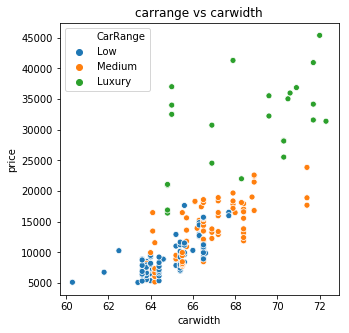

In [667]:
#bivariant analysis
plt.figure(figsize=(5,5))

plt.title('carrange vs carwidth')
sns.scatterplot(x=df['carwidth'],y=df['price'],hue=df['CarRange'])


plt.show()

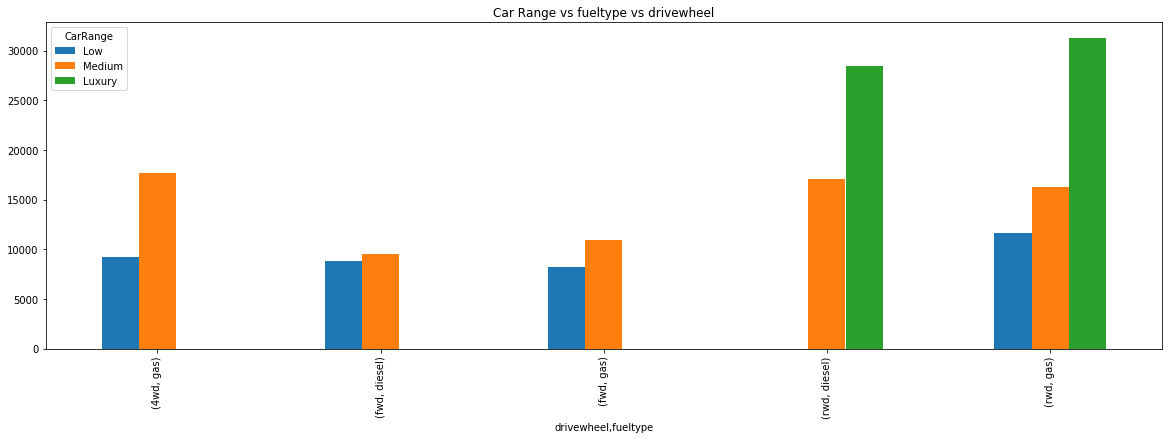

In [668]:
#bivariant analysis
#plotting drivewheel fueltype carrange relation with average price
figure = plt.figure(figsize= (20,6))
ax=plt.subplot2grid((1,1),(0,0))
#freq_df = uber_df.groupby(['PickupPoint'])['Status'].value_counts().unstack()
freq_df = df.groupby(['drivewheel','fueltype','CarRange'])['price'].mean().unstack()
ax =freq_df.plot(kind="bar",ax = ax)
plt.title('Car Range vs fueltype vs drivewheel')
plt.show()

In [669]:
#creating correlation between all significant varaiables
corr =['wheelbase',
       'carlength', 'carwidth', 'fueltype', 'carweight','enginesize','boreratio', 'aspiration',
        'horsepower', 'carbody', 'drivewheel', 'enginetype','cylindernumber','CarRange',
       'price']
df[corr].head()


,wheelbase,carlength,carwidth,fueltype,carweight,enginesize,boreratio,aspiration,horsepower,carbody,drivewheel,enginetype,cylindernumber,CarRange,price
0,88.6,168.8,64.1,gas,2548,130,3.47,std,111,convertible,rwd,dohc,four,Medium,13495.0
1,88.6,168.8,64.1,gas,2548,130,3.47,std,111,convertible,rwd,dohc,four,Medium,16500.0
2,94.5,171.2,65.5,gas,2823,152,2.68,std,154,hatchback,rwd,ohcv,six,Medium,16500.0
3,99.8,176.6,66.2,gas,2337,109,3.19,std,102,sedan,fwd,ohc,four,Medium,13950.0
4,99.4,176.6,66.4,gas,2824,136,3.19,std,115,sedan,4wd,ohc,five,Medium,17450.0


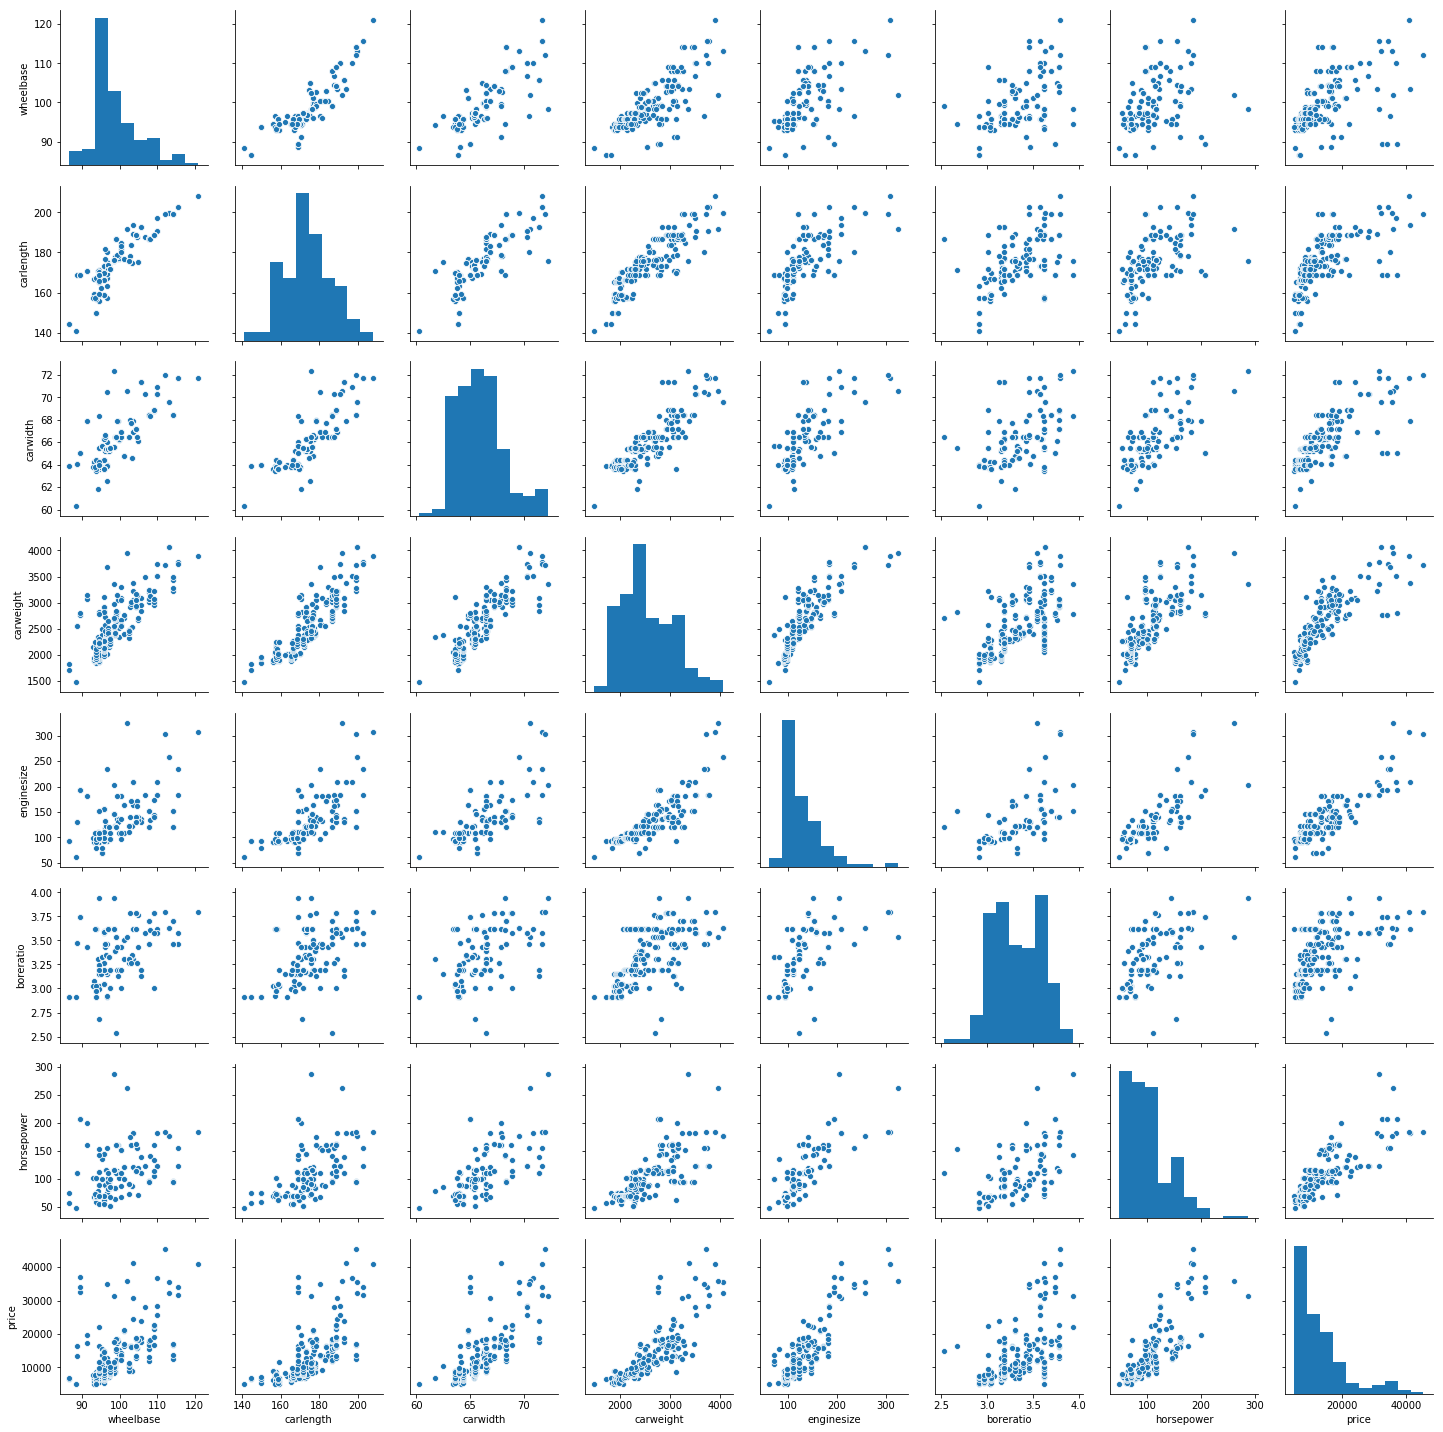

In [670]:
#plotting correlation between all significant variables
sns.pairplot(df[corr])
plt.show()

In [671]:
#creating dummy variables for all significant categorical variables.
fueltype = pd.get_dummies(df['fueltype'], drop_first = True).rename(columns=lambda x: 'fueltype_' + str(x))
df = pd.concat([df, fueltype], axis=1)
df.drop(['fueltype'], inplace=True, axis=1)

aspiration = pd.get_dummies(df['aspiration'], drop_first = True).rename(columns=lambda x: 'aspiration_' + str(x))
df = pd.concat([df, aspiration], axis=1)
df.drop(['aspiration'], inplace=True, axis=1)

carbody = pd.get_dummies(df['carbody'], drop_first = True).rename(columns=lambda x: 'carbody_' + str(x))
df = pd.concat([df, carbody], axis=1)
df.drop(['carbody'], inplace=True, axis=1)

drivewheel = pd.get_dummies(df['drivewheel'], drop_first = True).rename(columns=lambda x: 'drivewheel_' + str(x))
df = pd.concat([df, drivewheel], axis=1)
df.drop(['drivewheel'], inplace=True, axis=1)

enginetype = pd.get_dummies(df['enginetype'], drop_first = True).rename(columns=lambda x: 'enginetype_' + str(x))
df = pd.concat([df, enginetype], axis=1)
df.drop(['enginetype'], inplace=True, axis=1)

df['cylindernumber']= df['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
df['doornumber']= df['doornumber'].replace({'two':2,'four':4})

CarRange = pd.get_dummies(df['CarRange'], drop_first = True).rename(columns=lambda x: 'CarRange_' + str(x))
df = pd.concat([df, CarRange], axis=1)
df.drop(['CarRange'], inplace=True, axis=1)



In [672]:
fuelsystem = pd.get_dummies(df['fuelsystem'], drop_first = True).rename(columns=lambda x: 'fuelsystem_' + str(x))
df = pd.concat([df, fuelsystem], axis=1)
df.drop(['fuelsystem'], inplace=True, axis=1)

CarCompanyName = pd.get_dummies(df['CarCompanyName'], drop_first = True).rename(columns=lambda x: 'CarCompany_' + str(x))
df = pd.concat([df, CarCompanyName], axis=1)
df.drop(['CarCompanyName'], inplace=True, axis=1)

In [673]:
df.head()

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,carweight,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porcshce,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,1,3,alfa romero giulia,2,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa romero stelvio,2,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa romero Quadrifoglio,2,front,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4,front,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [674]:
df.shape

(205, 65)

In [675]:
#dropping the variables which has negative correlation, less corelation with price
#dropping the variables which has less datapoints.
df1 = df.copy()

df1.drop(labels = ["car_ID","symboling",'CarName',"doornumber","enginelocation","carheight","stroke","compressionratio",'peakrpm','citympg', 'highwaympg','CompanyAvgPrice'],axis =1,inplace=True) 


In [676]:
df1.shape

(205, 53)

In [677]:
df1.columns


Index(['wheelbase', 'carlength', 'carwidth', 'carweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'price', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'CarRange_Medium',
       'CarRange_Luxury', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
       'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_peugeot',
       'CarCompany_plymouth', 'CarCompany_porcshce', 'CarCompany_renault',
       'CarCompa

### Model 1 RFE with output variable 15

In [678]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)


In [679]:
#Using MixMax scaling for all significant variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [680]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth',
        'carweight', 'enginesize', 'boreratio', 
       'horsepower',
       'price','cylindernumber']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])



In [681]:
df_train.head()

,wheelbase,carlength,carwidth,carweight,cylindernumber,enginesize,boreratio,horsepower,price,fueltype_gas,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porcshce,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
122,0.244828,0.426016,0.291667,0.272692,0.2,0.139623,0.230159,0.083333,0.068818,1,...,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.2,0.339623,1.000000,0.395833,0.466890,1,...,0,0,0,1,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.314973,0.2,0.139623,0.444444,0.266667,0.122110,1,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.411171,0.2,0.260377,0.626984,0.262500,0.314446,1,...,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.647401,0.2,0.260377,0.746032,0.475000,0.382131,1,...,0,0,0,0,0,0,0,0,0,1


In [682]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [683]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [684]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)



In [685]:
#displaying RFE supporting variables and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 10),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 2),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('fueltype_gas', False, 31),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 21),
 ('enginetype_dohcv', False, 23),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 27),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 33),
 ('enginetype_rotor', False, 6),
 ('CarRange_Medium', False, 15),
 ('CarRange_Luxury', True, 1),
 ('fuelsystem_2bbl', False, 32),
 ('fuelsystem_4bbl', False, 11),
 ('fuelsystem_idi', False, 30),
 ('fuelsystem_mfi', False, 36),
 ('fuelsystem_mpfi', False, 17),
 ('fuelsystem_spdi', False, 22),
 ('fuelsystem_spfi', False, 37),
 ('CarCompany_audi', False, 8),
 ('CarCompany_bmw', True

In [686]:
#RFE supported variables
col = X_train.columns[rfe.support_]
col


Index(['carwidth', 'carweight', 'cylindernumber', 'boreratio', 'horsepower',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_l', 'enginetype_ohcf', 'CarRange_Luxury',
       'CarCompany_bmw', 'CarCompany_peugeot', 'CarCompany_subaru'],
      dtype='object')

In [687]:
#RFE non supported variables
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'enginesize', 'fueltype_gas',
       'aspiration_turbo', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'CarRange_Medium', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CarCompany_audi', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
       'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_plymouth',
       'CarCompany_porcshce', 'CarCompany_renault', 'CarCompany_saab',
       'CarCompany_toyota', 'CarCompany_volkswagen', 'CarCompany_volvo'],
      dtype='object')

In [688]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [689]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)



In [690]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()


In [691]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.68e-71
Time:                        21:52:58   Log-Likelihood:                 220.48
No. Observations:                 143   AIC:                            -409.0
Df Residuals:                     127   BIC:                            -361.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0026      0

#### R-squared: 0.942 and Adj. R-squared:   0.935 
#### AIC and BIC -409 and -361.6
#### some of the variables has pvalue >0.05

In [692]:
#cylindernumber is insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["cylindernumber"], axis = 1)


In [693]:
#rebuild the model without cylindernumber
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.27e-71
Time:                        21:52:58   Log-Likelihood:                 219.81
No. Observations:                 143   AIC:                            -409.6
Df Residuals:                     128   BIC:                            -365.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0212      0

#### R-squared: 0.941 and Adj. R-squared:   0.935
#### AIC and BIC -409 and -365
#### some of the variables has pvalue >0.05

In [694]:
#boreratio is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

In [695]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.83e-72
Time:                        21:52:58   Log-Likelihood:                 218.03
No. Observations:                 143   AIC:                            -408.1
Df Residuals:                     129   BIC:                            -366.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0381      0

#### R-squared: 0.940 and Adj. R-squared:   0.934
#### AIC and BIC -408 and -366
#### all variables has pvalue < 0.05 

In [696]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.26
9,enginetype_ohcf,20.15
13,CarCompany_subaru,19.73
12,CarCompany_peugeot,10.37
6,carbody_sedan,10.06
5,carbody_hatchback,9.27
8,enginetype_l,9.18
2,carweight,7.93
7,carbody_wagon,5.29
1,carwidth,5.26


In [697]:
#enginetype_ohcf is insignificant in presence of other variables; can be dropped which has high VIF
X_train_new = X_train_new.drop(["enginetype_ohcf"], axis = 1)

In [698]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.36e-69
Time:                        21:52:58   Log-Likelihood:                 207.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     130   BIC:                            -349.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0278      0

#### R-squared: 0.930 and Adj. R-squared:   0.924. R-squared and Adj.R-squared is reduced little. 
#### but still it is agood value
#### AIC and BIC -388 and -349
#### some of the variables has pvalue >0.05

In [699]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.03
11,CarCompany_peugeot,10.23
6,carbody_sedan,10.02
5,carbody_hatchback,9.27
8,enginetype_l,9.16
2,carweight,7.77
7,carbody_wagon,5.26
1,carwidth,5.12
3,horsepower,3.37
9,CarRange_Luxury,2.73


In [700]:
#carbody_hardtop is insignificant in presence of other variables; can be dropped which has pvalue >0.05
X_train_new = X_train_new.drop(["carbody_hardtop"], axis = 1)

In [701]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.84e-70
Time:                        21:52:59   Log-Likelihood:                 207.04
No. Observations:                 143   AIC:                            -390.1
Df Residuals:                     131   BIC:                            -354.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0324      0

In [702]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.34
10,CarCompany_peugeot,10.19
7,enginetype_l,9.15
2,carweight,7.63
5,carbody_sedan,6.45
4,carbody_hatchback,5.78
1,carwidth,5.12
6,carbody_wagon,3.70
3,horsepower,3.29
8,CarRange_Luxury,2.70


In [703]:
#CarCompany_subaru is insignificant in presence of other variables; can be dropped which has pvalue >0.05
X_train_new = X_train_new.drop(["CarCompany_subaru"], axis = 1)

In [704]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.21e-70
Time:                        21:52:59   Log-Likelihood:                 205.91
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     132   BIC:                            -357.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0344      0

In [705]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.25
10,CarCompany_peugeot,10.19
7,enginetype_l,9.15
2,carweight,7.57
5,carbody_sedan,6.42
4,carbody_hatchback,5.78
1,carwidth,5.11
6,carbody_wagon,3.60
3,horsepower,3.29
8,CarRange_Luxury,2.70


In [706]:
#CarCompany_peugeot is insignificant in presence of other variables; can be dropped which has high VIF which is >10
X_train_new = X_train_new.drop(["CarCompany_peugeot"], axis = 1)

In [707]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     181.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.05e-70
Time:                        21:52:59   Log-Likelihood:                 201.74
No. Observations:                 143   AIC:                            -383.5
Df Residuals:                     133   BIC:                            -353.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0231      0.02

In [708]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.60
2,carweight,7.48
5,carbody_sedan,6.39
4,carbody_hatchback,5.74
1,carwidth,4.93
6,carbody_wagon,3.59
3,horsepower,3.23
8,CarRange_Luxury,2.57
9,CarCompany_bmw,1.74
7,enginetype_l,1.29


In [709]:
#enginetype_l is insignificant in presence of other variables; can be dropped which has pvalue >0.05
X_train_new = X_train_new.drop(["enginetype_l"], axis = 1)

In [710]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     204.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.61e-71
Time:                        21:52:59   Log-Likelihood:                 201.44
No. Observations:                 143   AIC:                            -384.9
Df Residuals:                     134   BIC:                            -358.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0210      0.02

In [711]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.31
2,carweight,6.76
5,carbody_sedan,6.39
4,carbody_hatchback,5.74
1,carwidth,4.93
6,carbody_wagon,3.59
3,horsepower,2.93
7,CarRange_Luxury,2.45
8,CarCompany_bmw,1.73


In [712]:
#enginetype_l is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["CarCompany_bmw"], axis = 1)

In [713]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.67e-71
Time:                        21:52:59   Log-Likelihood:                 199.31
No. Observations:                 143   AIC:                            -382.6
Df Residuals:                     135   BIC:                            -358.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0201      0.02

In [714]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.31
2,carweight,6.75
5,carbody_sedan,6.07
4,carbody_hatchback,5.62
1,carwidth,4.68
6,carbody_wagon,3.52
3,horsepower,2.93
7,CarRange_Luxury,1.61


In [715]:
#enginetype_l is insignificant in presence of other variables; can be dropped; its VIF >5
X_train_new = X_train_new.drop(["carweight"], axis = 1)

In [716]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     218.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.86e-67
Time:                        21:52:59   Log-Likelihood:                 186.05
No. Observations:                 143   AIC:                            -358.1
Df Residuals:                     136   BIC:                            -337.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0129      0.02

In [717]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.23
4,carbody_sedan,6.04
3,carbody_hatchback,5.47
5,carbody_wagon,3.46
2,horsepower,2.32
1,carwidth,2.22
6,CarRange_Luxury,1.56


In [718]:
#carbody_sedan is insignificant in presence of other variables; can be dropped; its VIF >5
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)

In [719]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.06e-66
Time:                        21:53:00   Log-Likelihood:                 181.70
No. Observations:                 143   AIC:                            -351.4
Df Residuals:                     137   BIC:                            -333.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0784      0.01

In [720]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.44
2,horsepower,2.22
1,carwidth,2.09
5,CarRange_Luxury,1.55
3,carbody_hatchback,1.20
4,carbody_wagon,1.11


In [721]:
#carbody_wagon is insignificant in presence of other variables; can be dropped; its pvalue > 0.05
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)

In [722]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.04e-67
Time:                        21:53:00   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0824      0.01

#### R-squared: 0.899 and Adj. R-squared:   0.896. R-squared and Adj.R-squared has reduced little. 
#### but still it is agood value
#### AIC and BIC -352.1 and -337.3
#### all  variables has pvalue < 0.05

In [723]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
4,CarRange_Luxury,1.53
3,carbody_hatchback,1.10


#### As all variables has VIF value < 5 as well as pvalue<0.05,   dropping a variables has stopped and proceed with residual analysis
#### and proceed with residual analysis

#### Residual Analysis of the train data
#### So, now to check if the error terms are also normally distributed  (which is infact, one of the major assumptions of linear regression), 
#### let us plot the histogram of the error terms and see what it looks like.

In [724]:

y_train_price = lm.predict(X_train_lm)


In [725]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

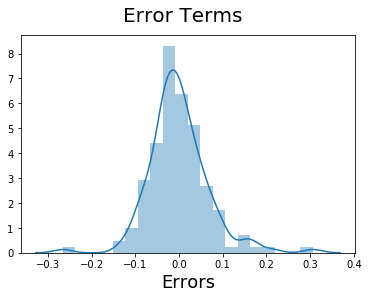

In [726]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [727]:
num_vars = ['wheelbase', 'carlength', 'carwidth',
        'carweight', 'enginesize', 'boreratio', 
       'horsepower',
       'price','cylindernumber']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [728]:
#Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [729]:


# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



In [730]:
# Making predictions
y_pred = lm.predict(X_test_new)


Text(0,0.5,'y_pred')

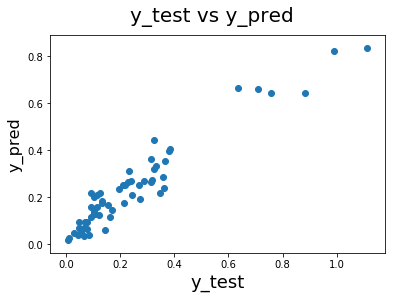

In [731]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [732]:
#getting r2score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8986678382302791

In [733]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.04e-67
Time:                        21:53:05   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0824      0.01

#### Inferences about this model:
#### carwidth, horsepower, carbody_hatchback, CarRange_Luxury have pvalue <0.05 means all are significant variables. 
#### VIF value for all  variables are below 5 means they are not correlated each other.
#### R-squared .899 and Adjusted R-squared .896 means 90 % variance are explained.
#### AIC and BIC are, too low, -352,-337 respectively.
#### It says model is good.

### Model 2 with RFE 10

In [734]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

#Using MixMax scaling for all significant variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth',
        'carweight', 'enginesize', 'boreratio', 
       'horsepower',
       'price','cylindernumber']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

#displaying RFE supporting variables and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

#RFE supported variables
col = X_train.columns[rfe.support_]

#RFE non supported variables
X_train.columns[~rfe.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.48e-72
Time:                        21:53:09   Log-Likelihood:                 209.78
No. Observations:                 143   AIC:                            -397.6
Df Residuals:                     132   BIC:                            -365.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1414      0

#### all variables has pvalue <0.05

In [735]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohcf,14.56
10,CarCompany_subaru,14.50
0,const,11.91
9,CarCompany_peugeot,10.35
5,enginetype_l,9.14
2,carweight,7.37
1,carwidth,5.01
3,horsepower,3.34
7,CarRange_Luxury,3.00
8,CarCompany_bmw,1.78


In [736]:
#enginetype_ohcf is insignificant in presence of other variables; can be dropped; its VIF is high
X_train_new = X_train_rfe.drop(["enginetype_ohcf"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     169.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.55e-68
Time:                        21:53:09   Log-Likelihood:                 197.26
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     133   BIC:                            -344.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1170      0

,Features,VIF
0,const,10.91
8,CarCompany_peugeot,10.11
5,enginetype_l,9.08
2,carweight,7.24
1,carwidth,4.77
3,horsepower,2.99
6,CarRange_Luxury,2.62
7,CarCompany_bmw,1.65
4,carbody_wagon,1.24
9,CarCompany_subaru,1.07


In [737]:
#CarCompany_subaru is insignificant in presence of other variables; can be dropped; its pvalue >0.05
X_train_new = X_train_new.drop(["CarCompany_subaru"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.26e-69
Time:                        21:53:09   Log-Likelihood:                 196.33
No. Observations:                 143   AIC:                            -374.7
Df Residuals:                     134   BIC:                            -348.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1197      0

,Features,VIF
0,const,10.77
8,CarCompany_peugeot,10.11
5,enginetype_l,9.07
2,carweight,7.20
1,carwidth,4.76
3,horsepower,2.99
6,CarRange_Luxury,2.62
7,CarCompany_bmw,1.65
4,carbody_wagon,1.18


In [738]:
#CarCompany_bmw is insignificant in presence of other variables; can be dropped; its pvalue >0.05
X_train_new = X_train_new.drop(["CarCompany_bmw"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.52e-69
Time:                        21:53:09   Log-Likelihood:                 194.52
No. Observations:                 143   AIC:                            -373.0
Df Residuals:                     135   BIC:                            -349.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1101      0

,Features,VIF
7,CarCompany_peugeot,9.98
0,const,9.81
5,enginetype_l,9.01
2,carweight,7.20
1,carwidth,4.58
3,horsepower,2.99
6,CarRange_Luxury,1.71
4,carbody_wagon,1.18


In [739]:
#enginetype_l is insignificant in presence of other variables; can be dropped; its pvalue >0.05
X_train_new = X_train_new.drop(["enginetype_l"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.75e-70
Time:                        21:53:09   Log-Likelihood:                 193.04
No. Observations:                 143   AIC:                            -372.1
Df Residuals:                     136   BIC:                            -351.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1030      0

,Features,VIF
0,const,9.18
2,carweight,7.20
1,carwidth,4.47
3,horsepower,2.99
5,CarRange_Luxury,1.70
6,CarCompany_peugeot,1.42
4,carbody_wagon,1.18


In [740]:
#CarCompany_peugeot is insignificant in presence of other variables; can be dropped; its pvalue >0.05
X_train_new = X_train_new.drop(["CarCompany_peugeot"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.33e-71
Time:                        21:53:09   Log-Likelihood:                 192.05
No. Observations:                 143   AIC:                            -372.1
Df Residuals:                     137   BIC:                            -354.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0968      0.016     

,Features,VIF
0,const,8.50
2,carweight,6.38
1,carwidth,4.46
3,horsepower,2.65
5,CarRange_Luxury,1.58
4,carbody_wagon,1.18


In [741]:
#carweight is insignificant in presence of other variables; can be dropped; its pvalue >0.05
X_train_new = X_train_new.drop(["carweight"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     284.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.51e-65
Time:                        21:53:09   Log-Likelihood:                 175.90
No. Observations:                 143   AIC:                            -341.8
Df Residuals:                     138   BIC:                            -327.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1066      0.017     

,Features,VIF
0,const,8.40
2,horsepower,2.14
1,carwidth,1.98
4,CarRange_Luxury,1.51
3,carbody_wagon,1.02


In [742]:
#carbody_wagon is insignificant in presence of other variables; can be dropped; its pvalue >0.05
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     381.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.18e-67
Time:                        21:53:09   Log-Likelihood:                 175.89
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     139   BIC:                            -331.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1068      0.017     

,Features,VIF
0,const,8.35
2,horsepower,2.13
1,carwidth,1.96
3,CarRange_Luxury,1.50


Text(0.5,0,'Errors')

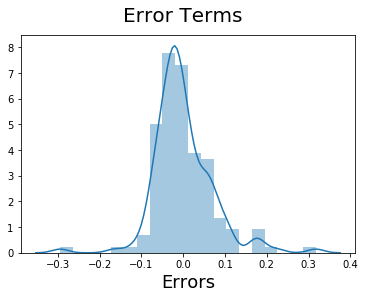

In [743]:
y_train_price = lm.predict(X_train_lm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [744]:
df_test.columns
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'CarRange_Medium',
       'CarRange_Luxury', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
       'CarCompany_mitsubishi', 'CarCompany_nissan', 'CarCompany_peugeot',
       'CarCompany_plymouth', 'CarCompany_porcshce', 'CarCompany_renault',
       'CarCompany_saab',

In [745]:


num_vars = ['wheelbase', 'carlength', 'carwidth',
        'carweight', 'enginesize', 'boreratio', 
       'horsepower',
       'price','cylindernumber']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x12dd2f358>>


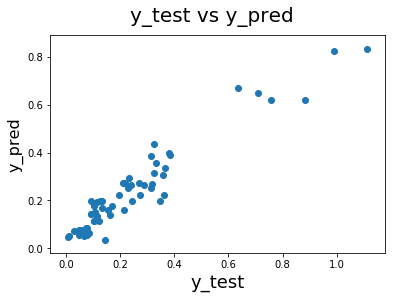

In [746]:


#Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test



# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#getting r2score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

print(lm.summary)

In [747]:
#getting r2score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8920555486660953

#### Model 2 gets almost similar r2_score as Model 1. but number of significant variable is 3 where as in model 1 significant variables are four
#### R-squared: 0.892 and Adj. R-squared:   0.889. R-squared and Adj.R-squared is less than model 1, but still it is a good value
#### AIC and BIC -343 and -331 respectively which is little high compared to model 1
#### all  variables has pvalue < 0.05 and all variables has VIF <5

### Model 3 RFE with output variable 13

In [748]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

#Using MixMax scaling for all significant variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth',
        'carweight', 'enginesize', 'boreratio', 
       'horsepower',
       'price','cylindernumber']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

#displaying RFE supporting variables and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

#RFE supported variables
col = X_train.columns[rfe.support_]

#RFE non supported variables
X_train.columns[~rfe.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.83e-72
Time:                        21:53:19   Log-Likelihood:                 218.03
No. Observations:                 143   AIC:                            -408.1
Df Residuals:                     129   BIC:                            -366.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0381      0

In [749]:
X_train.columns[rfe.support_]

Index(['carwidth', 'carweight', 'horsepower', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_l',
       'enginetype_ohcf', 'CarRange_Luxury', 'CarCompany_bmw',
       'CarCompany_peugeot', 'CarCompany_subaru'],
      dtype='object')

In [750]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.26
9,enginetype_ohcf,20.15
13,CarCompany_subaru,19.73
12,CarCompany_peugeot,10.37
6,carbody_sedan,10.06
5,carbody_hatchback,9.27
8,enginetype_l,9.18
2,carweight,7.93
7,carbody_wagon,5.29
1,carwidth,5.26


In [751]:
#dropping enginetype_ohcf variable, it has high VIF
X_train_new = X_train_rfe.drop(["enginetype_ohcf"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.36e-69
Time:                        21:53:19   Log-Likelihood:                 207.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     130   BIC:                            -349.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0278      0

,Features,VIF
0,const,45.26
9,enginetype_ohcf,20.15
13,CarCompany_subaru,19.73
12,CarCompany_peugeot,10.37
6,carbody_sedan,10.06
5,carbody_hatchback,9.27
8,enginetype_l,9.18
2,carweight,7.93
7,carbody_wagon,5.29
1,carwidth,5.26


In [752]:
#dropping carbody_hardtop, it has has  pvalue > 0.05 
X_train_new = X_train_new.drop(["carbody_hardtop"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.84e-70
Time:                        21:53:19   Log-Likelihood:                 207.04
No. Observations:                 143   AIC:                            -390.1
Df Residuals:                     131   BIC:                            -354.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0324      0

,Features,VIF
0,const,27.34
10,CarCompany_peugeot,10.19
7,enginetype_l,9.15
2,carweight,7.63
5,carbody_sedan,6.45
4,carbody_hatchback,5.78
1,carwidth,5.12
6,carbody_wagon,3.70
3,horsepower,3.29
8,CarRange_Luxury,2.70


In [753]:
#dropping CarCompany_subaru, it has pvalue>0.05
X_train_new = X_train_new.drop(["CarCompany_subaru"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.21e-70
Time:                        21:53:20   Log-Likelihood:                 205.91
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     132   BIC:                            -357.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0344      0

,Features,VIF
0,const,27.25
10,CarCompany_peugeot,10.19
7,enginetype_l,9.15
2,carweight,7.57
5,carbody_sedan,6.42
4,carbody_hatchback,5.78
1,carwidth,5.11
6,carbody_wagon,3.60
3,horsepower,3.29
8,CarRange_Luxury,2.70


In [754]:
#dropping CarCompany_peugeot, it has high VIF
X_train_new = X_train_new.drop(["CarCompany_peugeot"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     181.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.05e-70
Time:                        21:53:20   Log-Likelihood:                 201.74
No. Observations:                 143   AIC:                            -383.5
Df Residuals:                     133   BIC:                            -353.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0231      0.02

,Features,VIF
0,const,26.60
2,carweight,7.48
5,carbody_sedan,6.39
4,carbody_hatchback,5.74
1,carwidth,4.93
6,carbody_wagon,3.59
3,horsepower,3.23
8,CarRange_Luxury,2.57
9,CarCompany_bmw,1.74
7,enginetype_l,1.29


In [755]:
#dropping enginetype_l, it has pvalue >0.05
X_train_new = X_train_new.drop(["enginetype_l"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     204.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.61e-71
Time:                        21:53:20   Log-Likelihood:                 201.44
No. Observations:                 143   AIC:                            -384.9
Df Residuals:                     134   BIC:                            -358.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0210      0.02

,Features,VIF
0,const,26.31
2,carweight,6.76
5,carbody_sedan,6.39
4,carbody_hatchback,5.74
1,carwidth,4.93
6,carbody_wagon,3.59
3,horsepower,2.93
7,CarRange_Luxury,2.45
8,CarCompany_bmw,1.73


In [756]:
#dropping CarCompany_bmw, its pvalue is not < 0.05
X_train_new = X_train_new.drop(["CarCompany_bmw"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.67e-71
Time:                        21:53:20   Log-Likelihood:                 199.31
No. Observations:                 143   AIC:                            -382.6
Df Residuals:                     135   BIC:                            -358.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0201      0.02

,Features,VIF
0,const,26.31
2,carweight,6.75
5,carbody_sedan,6.07
4,carbody_hatchback,5.62
1,carwidth,4.68
6,carbody_wagon,3.52
3,horsepower,2.93
7,CarRange_Luxury,1.61


In [757]:
#dropping carweight column, it has high VIF
X_train_new = X_train_new.drop(["carweight"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     218.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.86e-67
Time:                        21:53:20   Log-Likelihood:                 186.05
No. Observations:                 143   AIC:                            -358.1
Df Residuals:                     136   BIC:                            -337.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0129      0.02

,Features,VIF
0,const,26.23
4,carbody_sedan,6.04
3,carbody_hatchback,5.47
5,carbody_wagon,3.46
2,horsepower,2.32
1,carwidth,2.22
6,CarRange_Luxury,1.56


In [758]:
#dropping carbody_sedan, it has high VIF
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.06e-66
Time:                        21:53:20   Log-Likelihood:                 181.70
No. Observations:                 143   AIC:                            -351.4
Df Residuals:                     137   BIC:                            -333.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0784      0.01

,Features,VIF
0,const,10.44
2,horsepower,2.22
1,carwidth,2.09
5,CarRange_Luxury,1.55
3,carbody_hatchback,1.20
4,carbody_wagon,1.11


In [759]:
#dropping carbody_wagon, it has pvalue >0.05
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.04e-67
Time:                        21:53:20   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0824      0.01

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
4,CarRange_Luxury,1.53
3,carbody_hatchback,1.10


#### as all variables are having pvalue <0.05 and VIF <5, dropping  columns has stopped at this point 
#### and proceeding with residual analysis

Text(0.5,0,'Errors')

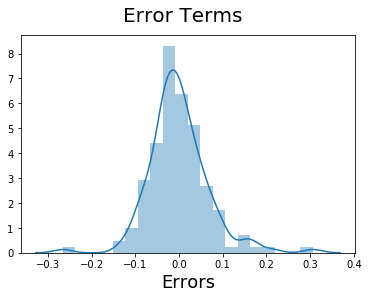

In [760]:
y_train_price = lm.predict(X_train_lm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [761]:

num_vars = ['wheelbase', 'carlength', 'carwidth',
        'carweight', 'enginesize', 'boreratio', 
       'horsepower',
       'price','cylindernumber']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x12dd77780>>


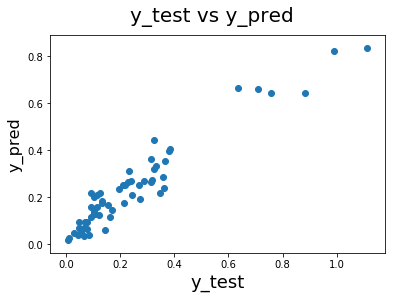

In [762]:


#Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test



# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#getting r2score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

print(lm.summary)

In [763]:
#getting r2score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8986678382302791

#### inference form model 3
#### r2score for model 3 with RFE 13 output variable  is exactly similar as model 1 which has RFE output variable is 15
#### model3's R-squared, adj R-squared, AIC, BIC are also same as model 1. 
#### significant variables of model3 (horsepower, carwidth, CarRange_Luxury, carbody_hatchback) is similar to model1
#### cylinder number and boreratio which are the extra columns in model1 but not in model3 not affecting the results  in anyways.
#### the analysis using only the 13 variables chosen would be enough for fitting the model.